<a href="https://colab.research.google.com/github/visiont3lab/machine-learning-course/blob/main/visualization/ClassNote_2_12_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Esercizio

## Capire i Dati

In [80]:
%load_ext google.colab.data_table 
#%unload_ext google.colab.data_table 

The google.colab.data_table extension is already loaded. To reload it, use:
  %reload_ext google.colab.data_table


In [82]:
import pandas as pd
import numpy as np
dati_italia = "https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-andamento-nazionale/dpc-covid19-ita-andamento-nazionale.csv"
data = pd.read_csv(dati_italia)
data.head()

,data,stato,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,casi_da_sospetto_diagnostico,casi_da_screening,totale_casi,tamponi,casi_testati,note
0,2020-02-24T18:00:00,ITA,101,26,127,94,221,0,221,1,7,NaN,NaN,229,4324,NaN,NaN
1,2020-02-25T18:00:00,ITA,114,35,150,162,311,90,93,1,10,NaN,NaN,322,8623,NaN,NaN
2,2020-02-26T18:00:00,ITA,128,36,164,221,385,74,78,3,12,NaN,NaN,400,9587,NaN,NaN
3,2020-02-27T18:00:00,ITA,248,56,304,284,588,203,250,45,17,NaN,NaN,650,12014,NaN,NaN
4,2020-02-28T18:00:00,ITA,345,64,409,412,821,233,238,46,21,NaN,NaN,888,15695,NaN,NaN


## Graficare dimessi guariti, deceduti, totale positivi vs data

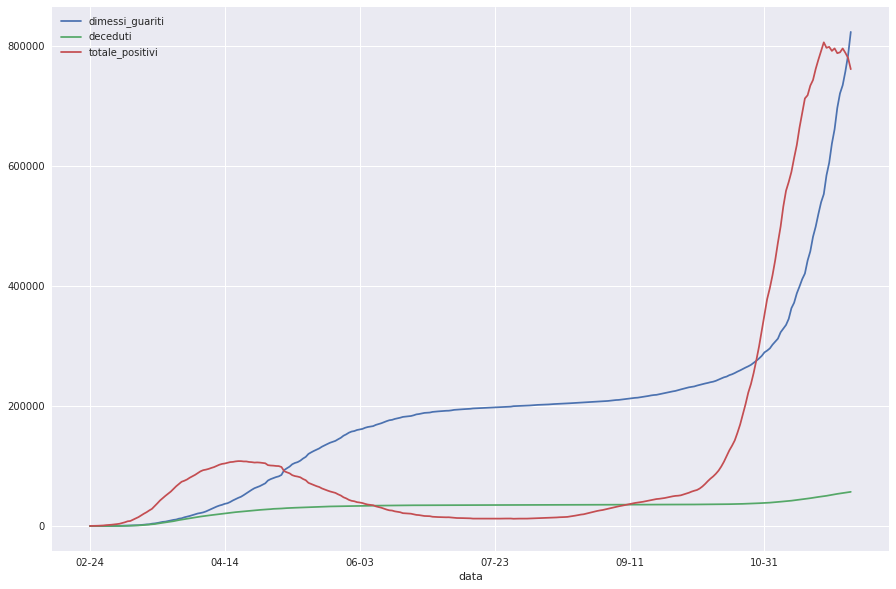

In [83]:
from matplotlib import pyplot as plt
from datetime import datetime
import pandas as pd
import numpy as np
dati_italia = "https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-andamento-nazionale/dpc-covid19-ita-andamento-nazionale.csv"
data = pd.read_csv(dati_italia)

l = ["data","dimessi_guariti","deceduti","totale_positivi"]
dn = data[l]
#dn.set_index("data").plot(kind="line", figsize=(15,8))

# Conversion String to Datetime
listaDate = pd.to_datetime(data["data"]) 
listDatetime = [d.to_pydatetime() for d in listaDate.tolist()]

# Add new column
dn.loc[:]["dataDatetime"]=listDatetime

'''
lnew = []
for el in listDatetime:
  lnew.append(el.strftime("%m-%d"))
dn["data"] = lnew
'''
lnew = [el.strftime("%m-%d") for el in listDatetime]

#dn["data"] =lnew          #not best
#dn.loc[:,("data")] = lnew # Not best
dn.loc[:]["data"] = lnew #  Correct

#with plt.style.context("dark_background"):   
with plt.style.context("seaborn"):   
    dn.set_index("data").plot(y=["dimessi_guariti","deceduti","totale_positivi"],kind="line", figsize=(15,10))


## Datetime Conversion

In [84]:
from datetime import datetime
import warnings
warnings.filterwarnings(action='ignore')
import pandas as pd
import numpy as np
dati_italia = "https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-andamento-nazionale/dpc-covid19-ita-andamento-nazionale.csv"
data = pd.read_csv(dati_italia)

l = ["data","dimessi_guariti","deceduti","totale_positivi"]
dn = data[l]
#dn.set_index("data").plot(kind="line", figsize=(15,8))

# Conversion String to Datetime
listaDate = pd.to_datetime(data["data"]) #, format='%Y-%m-%dT%H:%M:%S', errors='ignore') # pandas timestamp datetime
listDatetime = [d.to_pydatetime() for d in listaDate.tolist()]
dn["data"] = listDatetime

# Select by date
dn[dn["data"].dt.date==datetime(2020,11,1).date()]
#dn[dn["data"].dt.date>datetime(2020,9,1).date()]



,data,dimessi_guariti,deceduti,totale_positivi
251,2020-11-01 17:00:00,292380,38826,378129


## Matplolib Example

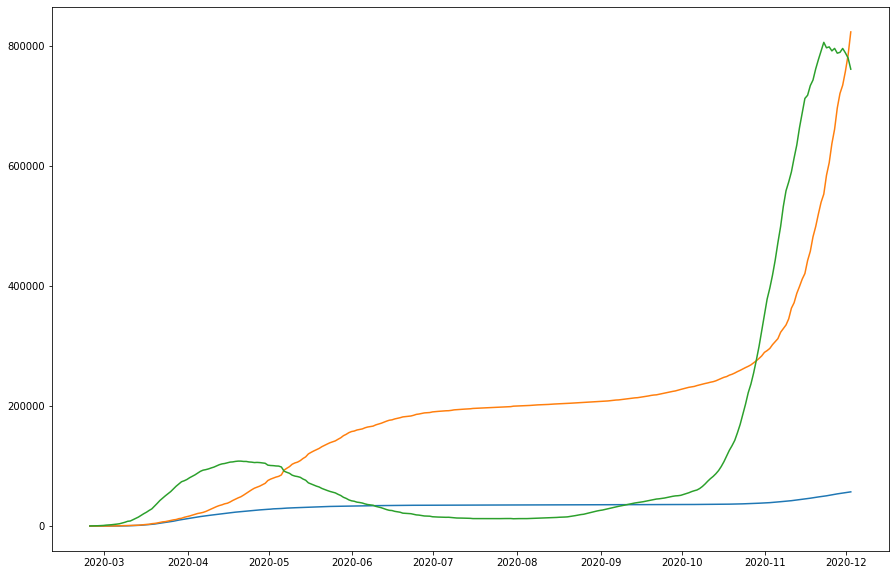

In [87]:
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt 
dati_italia = "https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-andamento-nazionale/dpc-covid19-ita-andamento-nazionale.csv" 
data = pd.read_csv(dati_italia) 
data["data"] = pd.to_datetime(data["data"])

small_data = data[["data","dimessi_guariti","deceduti","totale_positivi"]] 

X = small_data["data"].tolist()
Y1 = small_data["deceduti"].tolist()
Y2 = small_data["dimessi_guariti"].tolist()
Y3 = small_data["totale_positivi"].tolist()

fig = plt.figure(figsize=(15,10))
plt.plot(X,Y1)
plt.plot(X,Y2)
plt.plot(X,Y3)
plt.show()
